In [2]:
!pip install scikit-learn
!pip install pandas


In [3]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd #import pandas library for reading CSV

# Load dataset
training_data = pd.read_csv('./Datasets/wildfires_training.csv')
test_data = pd.read_csv('./Datasets/wildfires_test.csv')
# Check to see if csv is loaded correctly
print(training_data.head())
print(test_data.head()) 

# Check to make sure test and training data have the same feature set.
training_first_row = training_data.iloc[0]  # Get the first row of the training dataset
test_first_row = test_data.iloc[0]          # Get the first row of the test dataset

# Assert that both training and test data set have the same features
assert list(training_data.drop('fire', axis=1).columns) == list(test_data.drop('fire', axis=1).columns)
list(training_data.drop('fire', axis=1).columns) 

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31       

['year',
 'temp',
 'humidity',
 'rainfall',
 'drought_code',
 'buildup_index',
 'day',
 'month',
 'wind_speed']

In [4]:

X_test = test_data.drop('fire', axis=1)  # Featuåres (everything except "fire")
y_test = test_data['fire']               # Target variable (What I want to predict "fire" column)
print(X_test.head())
print(y_test.head())  

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    33        68       4.5          9.12           5.09   19      6   
1  2009    28        56       0.0         38.17          21.21   12      6   
2  2017    30        64       0.6         15.38           6.24   24      9   
3  2007    23        74       8.3          7.36           2.27   14      9   
4  2017    31        72       0.3         30.47           5.63    7      9   

   wind_speed  
0          16  
1          18  
2          19  
3          28  
4          17  
0     no
1    yes
2     no
3     no
4     no
Name: fire, dtype: object


In [5]:
X_training = training_data.drop('fire', axis=1)  # Features (everything except "fire")
y_training = training_data['fire']   
print(X_training.head())  
print(y_training.head())           # Target variable (What I want to predict "fire" column)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    28        59       0.0          8.06           3.47    1      6   
1  2010    30        61       1.3          8.17           4.03    2      6   
2  2009    26        83      13.1          8.08           3.59    3      6   
3  2017    25        87       2.5          7.18           2.42    4      6   
4  2014    28        77       0.0         14.98           4.63    5      6   

   wind_speed  
0          19  
1          13  
2          22  
3          15  
4          18  
0    no
1    no
2    no
3    no
4    no
Name: fire, dtype: object


In [6]:
# Entropy of the indepednent variable 
from scipy.stats import entropy
print(y_training.value_counts(normalize=True))  # Training data
training_entropy = entropy(y_training.value_counts(normalize=True), base=2)
print(f"Entropy of training data: {training_entropy}")

fire
yes    0.512987
no     0.487013
Name: proportion, dtype: float64
Entropy of training data: 0.9995132881417702


In [51]:
# Model Training using default hyperp parameters
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

lr_model = LogisticRegression()

#Fit the model to the training data
lr_model.fit(X_training, y_training)

#Compute accuracy on the training predictions
#predictions = lr_model.predict(X_training)
#print("Predictions on training dataset provided:", predictions)
accuracy = lr_model.score(X_training, y_training)

print("Accuracy on training dataset(default):", accuracy)
print(classification_report(y_training, lr_model.predict(X_training)))

Accuracy on training dataset(default): 0.8961038961038961
              precision    recall  f1-score   support

          no       0.89      0.89      0.89        75
         yes       0.90      0.90      0.90        79

    accuracy                           0.90       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.90      0.90      0.90       154



/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 1 /.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# Test model accuracy after standardisation
lr_model.predict(X_test)
test_accuracy = lr_model.score(X_test, y_test)

print("Accuracy on test dataset(default):", test_accuracy)
print(classification_report(y_test, lr_model.predict(X_test)))

Accuracy on test dataset(default): 0.86
              precision    recall  f1-score   support

          no       0.80      0.91      0.85        22
         yes       0.92      0.82      0.87        28

    accuracy                           0.86        50
   macro avg       0.86      0.87      0.86        50
weighted avg       0.87      0.86      0.86        50



### Model Fine-Tuning

/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 1 /.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 1 /.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You 

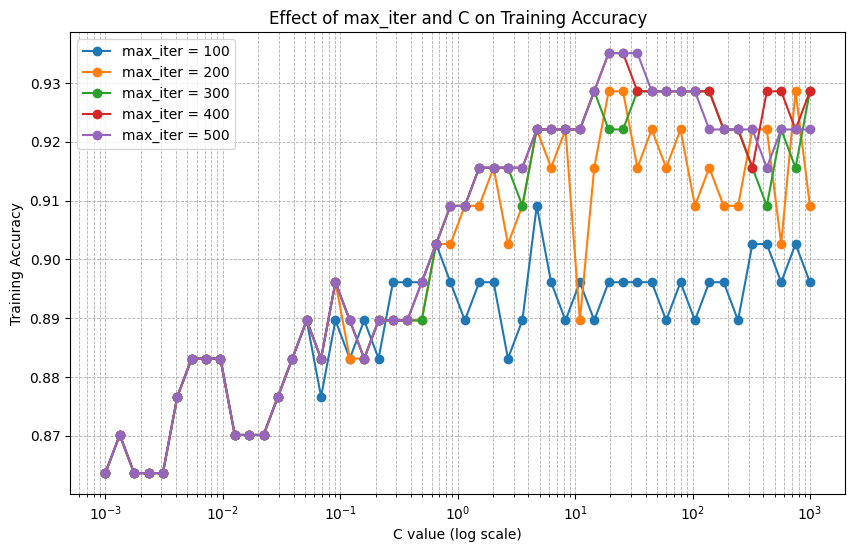

The best combination of hyperparameters is: {'max_iter': 400, 'C': np.float64(19.306977288832496)}
The highest accuracy achieved is: 0.935064935064935


In [49]:
#from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

def find_best_hyperparameters(X_training, y_training, c_values=np.logspace(-3, 3, 50), max_iter_values=[100, 200, 300, 400, 500]):

    best_params = {"max_iter": None, "C": None}
    best_accuracy = 0.0
    results = []

    for max_iter in max_iter_values:
        for c in c_values:
            # Create and train the model
            lr_model = LogisticRegression(max_iter=max_iter, C=c, random_state=42)
            lr_model.fit(X_training, y_training)
            
            # Evaluate the model
            accuracy = lr_model.score(X_training, y_training)
            results.append((max_iter, c, accuracy))
            #print(f"max_iter: {max_iter}, C: {c:.3f}, Accuracy: {accuracy}")
            
            # Update the best parameters if the current accuracy is higher
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params["max_iter"] = max_iter
                best_params["C"] = c

   # print(f"\nBest Parameters: {best_params}, Best Accuracy: {best_accuracy}")
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    for max_iter in max_iter_values:
        accuracies = [accuracy for (iter_val, c_val, accuracy) in results if iter_val == max_iter]
        plt.semilogx(c_values, accuracies, marker='o', linestyle='-', label=f"max_iter = {max_iter}")
    
    plt.xlabel("C value (log scale)")
    plt.ylabel("Training Accuracy")
    plt.title("Effect of max_iter and C on Training Accuracy")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.6)
    plt.show()
    
    return best_params, best_accuracy

# Example usage:
c_values = np.logspace(-3, 3, 50)  # Test C values from 0.001 to 1000 on a logarithmic scale
max_iter_values = [100, 200, 300, 400, 500]  # Test max_iter values

best_params, best_accuracy = find_best_hyperparameters(X_training, y_training, c_values, max_iter_values)

print(f"The best combination of hyperparameters is: {best_params}")
print(f"The highest accuracy achieved is: {best_accuracy}")

In [ ]:
# Highest Accuracy on training data with hyperparameters
# Model fitting and accuracy evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

#Model with default settings, setting random_state for reproducibility
lr_model = LogisticRegression(max_iter = 400, C = 19.306977288832496)

#Fit the model to the training data
lr_model.fit(X_training, y_training)

#Compute accuracy on the training predictions
#predictions = lr_model.predict(X_training)
#print("Predictions on training dataset provided:", predictions)
training_accuracy = lr_model.score(X_training, y_training)

print("Accuracy on training dataset provided:", training_accuracy)


Accuracy on training dataset provided: 0.935064935064935


/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 1 /.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 1 /.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You 

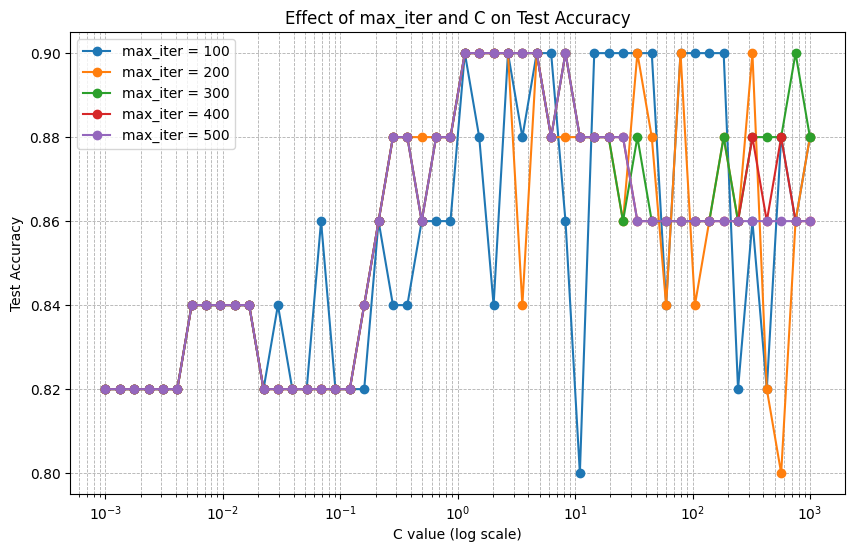

The best combination of hyperparameters is: {'max_iter': 200, 'C': np.float64(4.714866363457395)}
The highest training accuracy achieved is: 0.922077922077922
The highest test accuracy achieved is: 0.9


In [43]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

def find_best_hyperparameters(X_training, y_training, X_test, y_test, 
                               c_values=np.logspace(-3, 3, 50), 
                               max_iter_values=[100, 200, 300, 400, 500]):
    best_params = {"max_iter": None, "C": None}
    best_train_accuracy = 0.0
    best_test_accuracy = 0.0
    results = []

    for max_iter in max_iter_values:
        for c in c_values:
            # Create and train the model
            lr_model = LogisticRegression(max_iter=max_iter, C=c, random_state=42)
            lr_model.fit(X_training, y_training)
            
            # Evaluate the model on training and test datasets
            train_accuracy = lr_model.score(X_training, y_training)
            test_accuracy = lr_model.score(X_test, y_test)
            results.append((max_iter, c, train_accuracy, test_accuracy))
            
            # Update the best parameters if the current combination is better
            if test_accuracy > best_test_accuracy or (test_accuracy == best_test_accuracy and train_accuracy > best_train_accuracy):
                best_train_accuracy = train_accuracy
                best_test_accuracy = test_accuracy
                best_params["max_iter"] = max_iter
                best_params["C"] = c

    #print(f"\nBest Parameters: {best_params}, Best Train Accuracy: {best_train_accuracy}, Best Test Accuracy: {best_test_accuracy}")
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    for max_iter in max_iter_values:
        test_accuracies = [test_acc for (iter_val, c_val, train_acc, test_acc) in results if iter_val == max_iter]
        plt.semilogx(c_values, test_accuracies, marker='o', linestyle='-', label=f"max_iter = {max_iter}")
    
    plt.xlabel("C value (log scale)")
    plt.ylabel("Test Accuracy")
    plt.title("Effect of max_iter and C on Test Accuracy")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.6)
    plt.show()
    
    return best_params, best_train_accuracy, best_test_accuracy

# Example usage:
c_values = np.logspace(-3, 3, 50)  # Test C values from 0.001 to 1000 on a logarithmic scale
max_iter_values = [100, 200, 300, 400, 500]  # Test max_iter values

best_params, best_train_accuracy, best_test_accuracy = find_best_hyperparameters(
    X_training, y_training, X_test, y_test, c_values, max_iter_values
)

print(f"The best combination of hyperparameters is: {best_params}")
print(f"The highest training accuracy achieved is: {best_train_accuracy}")
print(f"The highest test accuracy achieved is: {best_test_accuracy}")

In [47]:
# Highest Accuracy on training data with hyperparameters
# Model fitting and accuracy evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

#Model with default settings, setting random_state for reproducibility
lr_model = LogisticRegression(max_iter = 200, C = 4.714866363457395)

#Fit the model to the training data
lr_model.fit(X_training, y_training)

#Compute accuracy on the training predictions
#predictions = lr_model.predict(X_training)
#print("Predictions on training dataset provided:", predictions)
training_accuracy = lr_model.score(X_training, y_training)

print("Accuracy on training dataset provided:", training_accuracy)
print(classification_report(y_test, lr_model.predict(X_test)))


Accuracy on training dataset provided: 0.922077922077922
              precision    recall  f1-score   support

          no       0.87      0.91      0.89        22
         yes       0.93      0.89      0.91        28

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 1 /.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
# Test model accuracy after standardisation
lr_model.predict(X_test)
test_accuracy = lr_model.score(X_test, y_test)

print("Accuracy on test dataset provided:", test_accuracy)
print(classification_report(y_test, lr_model.predict(X_test)))

Accuracy on test dataset provided: 0.9
              precision    recall  f1-score   support

          no       0.87      0.91      0.89        22
         yes       0.93      0.89      0.91        28

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



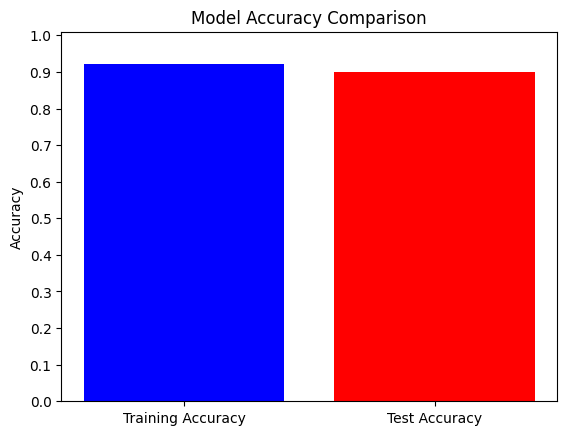

In [46]:
plt.bar(['Training Accuracy', 'Test Accuracy'], [training_accuracy, test_accuracy], color=['blue', 'red'])
plt.ylim(0, 1.01)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [10]:
# Some pre-processing on the data(scaling)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_training_scaled = scaler.fit_transform(X_training)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter = 250, C = 40)

#Fit the model to the training data
lr_model.fit(X_training_scaled, y_training)

#Compute accuracy on the training predictions
#predictions = lr_model.predict(X_training)
#print("Predictions on training dataset provided:", predictions)
accuracy = lr_model.score(X_training_scaled, y_training)

print("Accuracy on training dataset provided after scaling the data:", accuracy)

Accuracy on training dataset provided after scaling the data: 0.9155844155844156


In [11]:
# Test model accuracy after standardisation
lr_model.predict(X_test_scaled)
test_accuracy = lr_model.score(X_test_scaled, y_test)

print("Accuracy on test dataset provided after scaling the data:", test_accuracy)

Accuracy on test dataset provided after scaling the data: 0.88
